In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('datasets/deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Total Runs made by each player through all years

In [4]:
a = data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False)
#a.to_csv('BatsmansRuns1819.csv',index=False)
a = a.iloc[:10]
a

,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


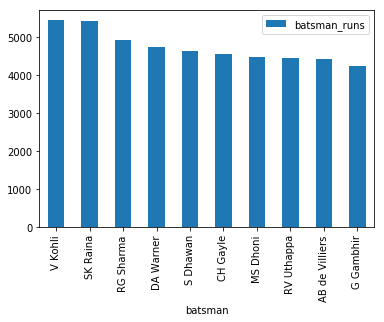

In [5]:
a.plot.bar(x='batsman')

Highest runs in each match

In [6]:
a1 = data.groupby(['match_id','batsman'])['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False)
#aa.to_csv("highest_runs.csv",index=False)
a1.head()

,match_id,batsman,batsman_runs
6200,411,CH Gayle,175
900,60,BB McCullum,158
8426,562,AB de Villiers,133
10149,7935,RR Pant,130
9257,620,AB de Villiers,129


Player with highest number of highest runs

In [7]:
a2 = a1.groupby(['batsman'])['batsman_runs'].agg('count').reset_index().sort_values(by='batsman_runs',ascending=False)
#aa.to_csv("highest_runs.csv",index=False)
a2.head()

,batsman,batsman_runs
428,SK Raina,189
367,RG Sharma,182
384,RV Uthappa,170
290,MS Dhoni,170
486,V Kohli,169


Number of 50's scored by each batsman

In [8]:
a3 = a1.groupby('batsman')['batsman_runs'].agg(lambda x: (x>=50).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
#a2.to_csv("fifty1819.csv",index=False)
a3.head()

,batsman,batsman_runs
0,DA Warner,48
1,V Kohli,43
2,SK Raina,39
3,AB de Villiers,37
4,S Dhawan,37


Numer of 100's scored by each player

In [9]:
a4 = a1.groupby('batsman')['batsman_runs'].agg(lambda x: (x>=100).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
#a3.to_csv("hundred1819.csv",index=False)
a4.head()

,batsman,batsman_runs
0,CH Gayle,7
1,V Kohli,5
2,SR Watson,4
3,DA Warner,4
4,AB de Villiers,3


Numer of 30's scored by each player

In [10]:
a5 = a1.groupby('batsman')['batsman_runs'].agg(lambda x: (x>=30).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
#a4.to_csv("thirty1819.csv",index=False)
a5.head()

,batsman,batsman_runs
0,V Kohli,77
1,SK Raina,76
2,RG Sharma,68
3,DA Warner,67
4,RV Uthappa,65


Strike Rate of each Player

In [11]:
a6 = data.groupby(['batsman'])['batsman'].count()
a6=pd.DataFrame(a6)
a61= a6.rename(columns={'batsman':'no of balls'})
a61.reset_index()
a61.head()

,no of balls
batsman,
A Ashish Reddy,196
A Chandila,7
A Chopra,75
A Choudhary,20
A Dananjaya,5


In [12]:
a62 = data.groupby(['batsman'])['batsman_runs'].sum()
a62=pd.DataFrame(a62)
a62= a62.rename(columns={'batsman':'no of runs'})
a62.reset_index().head()

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4


In [13]:
a63=pd.merge(a62,a61,on='batsman')
a63=a63.reset_index()

a63['strike']=a63['batsman_runs']/a63['no of balls']
a63['strike']=a63['strike']*100
#a63.to_csv('strike1819.csv',index=False)
a63.head()

,batsman,batsman_runs,no of balls,strike
0,A Ashish Reddy,280,196,142.857143
1,A Chandila,4,7,57.142857
2,A Chopra,53,75,70.666667
3,A Choudhary,25,20,125.000000
4,A Dananjaya,4,5,80.000000


Number of 6's

In [14]:
a7 = data.groupby('batsman')['total_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
#a7.to_csv('batsmans_six1617.csv',index=False)
a7.head()

,batsman,total_runs
0,CH Gayle,322
1,AB de Villiers,211
2,MS Dhoni,207
3,SK Raina,194
4,RG Sharma,193


Number of 4's

In [15]:
a8 = data.groupby('batsman')['total_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
#a8.to_csv('batsmans_four1819.csv',index=False)
a8.head()

,batsman,total_runs
0,S Dhawan,529
1,G Gambhir,499
2,SK Raina,492
3,V Kohli,486
4,DA Warner,462


Average Runs

In [16]:
data = pd.read_csv('datasets\deliveries.csv')
cd=data.groupby(['match_id','batsman'])['batsman_runs'].sum()
cd.head()

match_id  batsman    
1         A Choudhary     6
          BCJ Cutting    16
          CH Gayle       32
          DA Warner      14
          DJ Hooda       16
Name: batsman_runs, dtype: int64

In [17]:
cd0 = pd.DataFrame(cd)
ave_run=cd0.groupby('batsman')['batsman_runs'].mean().sort_values(ascending=False)
ave_run=pd.DataFrame(ave_run)
ave_run=ave_run.reset_index()
#ave_run.to_csv('avgrun19.csv',index=False)
ave_run.head()

,batsman,batsman_runs
0,J Bairstow,46.800000
1,DA Warner,37.626984
2,LMP Simmons,37.206897
3,CH Gayle,36.774194
4,SE Marsh,36.072464
